<a href="https://colab.research.google.com/github/UroojFatima16/diabetes-xai-llm/blob/main/XAI_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
dataset = pd.read_csv('/content/drive/MyDrive/diabetes_data_upload.csv')
dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [8]:
dataset.shape

(520, 17)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [5]:
dataset.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [10]:
Q1 = dataset['Age'].quantile(0.25)
Q3 = dataset['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = dataset[
    (dataset['Age'] < lower_bound) |
    (dataset['Age'] > upper_bound)
]

print("IQR Lower Bound:", lower_bound)
print("IQR Upper Bound:", upper_bound)
print("Number of IQR Outliers:", outliers_iqr.shape[0])

IQR Lower Bound: 12.0
IQR Upper Bound: 84.0
Number of IQR Outliers: 4


Encoding


In [11]:
categorical_cols = dataset.select_dtypes(include=['object']).columns.tolist()

categorical_cols.remove('class')

categorical_cols


['Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity']

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    dataset[col] = le.fit_transform(dataset[col])

In [13]:
dataset['class'] = dataset['class'].map({
    'Positive': 1,
    'Negative': 0
})


In [14]:
dataset.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [15]:
class_counts = dataset['class'].value_counts()
print(class_counts)

class_percentage = dataset['class'].value_counts(normalize=True) * 100
print(class_percentage)


class
1    320
0    200
Name: count, dtype: int64
class
1    61.538462
0    38.461538
Name: proportion, dtype: float64


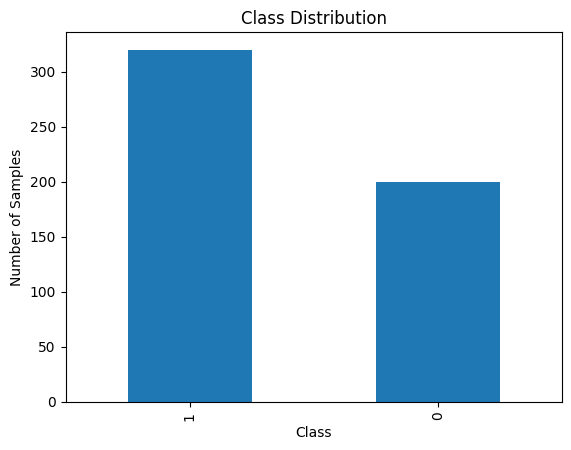

In [16]:
import matplotlib.pyplot as plt

class_counts = dataset['class'].value_counts()

# Plot
plt.figure()
class_counts.plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = dataset.drop(columns=['class'])
y = dataset['class']

# Train-test split (stratified due to mild imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Verify split
print("Training set class distribution:")
print(y_train.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())

Training set class distribution:
class
1    256
0    160
Name: count, dtype: int64

Test set class distribution:
class
1    64
0    40
Name: count, dtype: int64



--- Logistic Regression ---
Training Accuracy: 0.9423
Testing Accuracy:  0.9327
Recall:            0.9062
F1 Score:          0.9431
Cross-Validation Recall: 0.9334 ± 0.0320


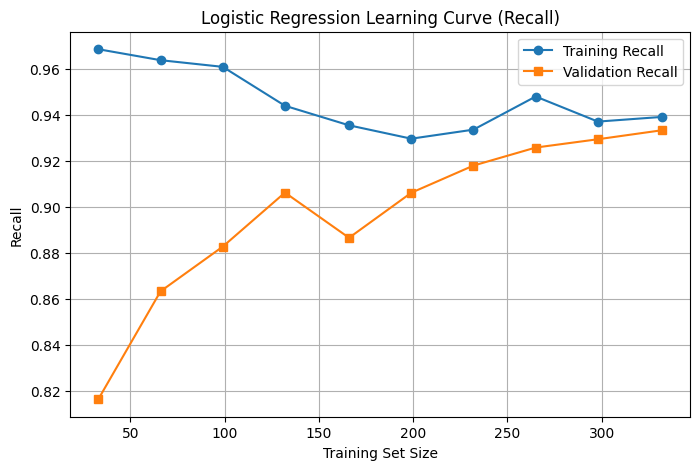


--- Random Forest ---
Training Accuracy: 0.9784
Testing Accuracy:  0.9808
Recall:            0.9688
F1 Score:          0.9841
Cross-Validation Recall: 0.9530 ± 0.0201


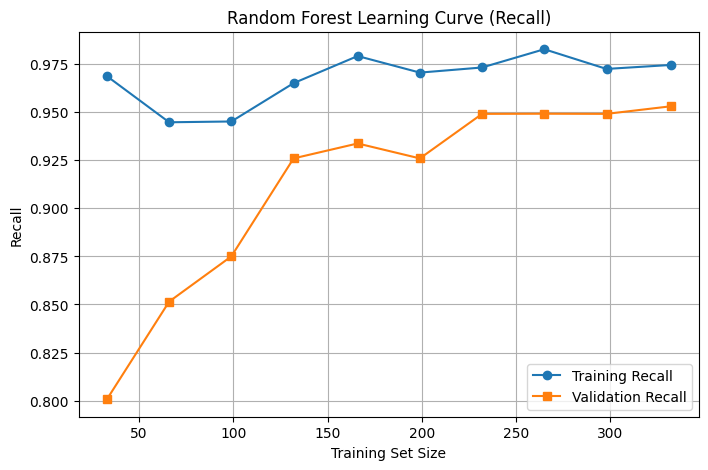


--- Naive Bayes ---
Training Accuracy: 0.8966
Testing Accuracy:  0.9423
Recall:            0.9375
F1 Score:          0.9524
Cross-Validation Recall: 0.9062 ± 0.0231


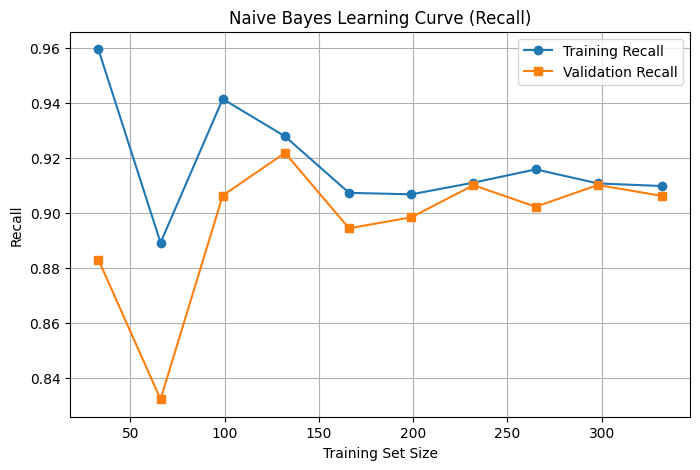

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, learning_curve, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    print(f"\n--- {model_name} ---")

    # Fit
    model.fit(X_train, y_train)

    # Predict once
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy:  {test_acc:.4f}")
    print(f"Recall:            {recall:.4f}")
    print(f"F1 Score:          {f1:.4f}")

    # Stratified CV
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    cv_scores = cross_val_score(
        model,
        X_train,
        y_train,
        cv=cv,
        scoring='recall'
    )

    print(f"Cross-Validation Recall: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

    train_sizes, train_scores, val_scores = learning_curve(
        model,
        X_train,
        y_train,
        cv=cv,
        scoring='recall',
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean, marker='o', label='Training Recall')
    plt.plot(train_sizes, val_mean, marker='s', label='Validation Recall')
    plt.title(f"{model_name} Learning Curve (Recall)")
    plt.xlabel("Training Set Size")
    plt.ylabel("Recall")
    plt.grid(True)
    plt.legend()
    plt.show()


logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ))
])

evaluate_model(
    logreg,
    X_train, X_test, y_train, y_test,
    model_name="Logistic Regression"
)


# Random Forest
rf_safe = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

evaluate_model(
    rf_safe,
    X_train, X_test, y_train, y_test,
    model_name="Random Forest"
)


# Naive Bayes
nb_generalized = Pipeline([
    ('scaler', StandardScaler()),
    ('gnb', GaussianNB(var_smoothing=1e-9))
])

evaluate_model(
    nb_generalized,
    X_train, X_test, y_train, y_test,
    model_name="Naive Bayes"
)


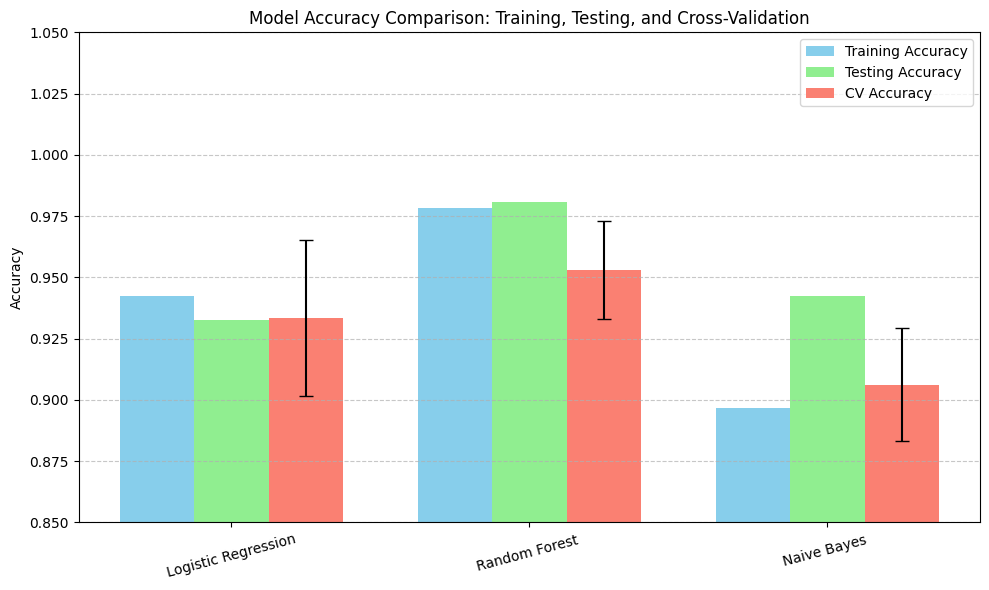

In [21]:

# Models aur metrics
models = ['Logistic Regression', 'Random Forest ', 'Naive Bayes ']
# Accuracy (from final results)
train_acc = [0.9423, 0.9784, 0.8966]
test_acc  = [0.9327, 0.9808, 0.9423]

cv_recall = [0.9334, 0.9530, 0.9062]
cv_std    = [0.0320, 0.0201, 0.0231]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, train_acc, width, label='Training Accuracy', color='skyblue')
plt.bar(x, test_acc, width, label='Testing Accuracy', color='lightgreen')
plt.bar(x + width, cv_recall, width, yerr=cv_std, label='CV Accuracy', color='salmon', capsize=5)

plt.ylabel('Accuracy')
plt.ylim(0.85, 1.05)
plt.xticks(x, models, rotation=15)
plt.title('Model Accuracy Comparison: Training, Testing, and Cross-Validation')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Explanaible AI

In [22]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b4a0b6677e719cfb040e9bb294a27432e5ec0e9b18e652c79a2aecebd347c53b
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [25]:
import lime
import lime.lime_tabular



In [26]:
# Convert to NumPy
X_train_np = X_train.values
X_test_np = X_test.values

# Feature names
feature_names = X_train.columns.tolist()

# Class names (very important for medical clarity)
class_names = ['Non-Diabetic', 'Diabetic']

In [27]:
rf_safe.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=3, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [29]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_np,
    feature_names=feature_names,
    class_names=class_names,
    mode='classification',
    discretize_continuous=True,
    random_state=42
)


In [48]:
i = 0

exp = explainer.explain_instance(
    data_row=X_test_np[i],
    predict_fn=rf_safe.predict_proba,
    num_features=10
)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [49]:
exp.show_in_notebook(show_table=True)


In [50]:
lime_df = pd.DataFrame(
    exp.as_list(),
    columns=['Feature', 'Contribution']
)

lime_df

,Feature,Contribution
0,Polyuria <= 0.00,-0.296149
1,Polydipsia <= 0.00,-0.231650
2,Gender <= 0.00,0.164024
3,sudden weight loss <= 0.00,-0.075603
4,Irritability <= 0.00,-0.057204
5,0.00 < Alopecia <= 1.00,-0.056500
6,Polyphagia <= 0.00,-0.055502
7,partial paresis <= 0.00,-0.047280
8,0.00 < Itching <= 1.00,-0.043269
9,muscle stiffness <= 0.00,0.024798


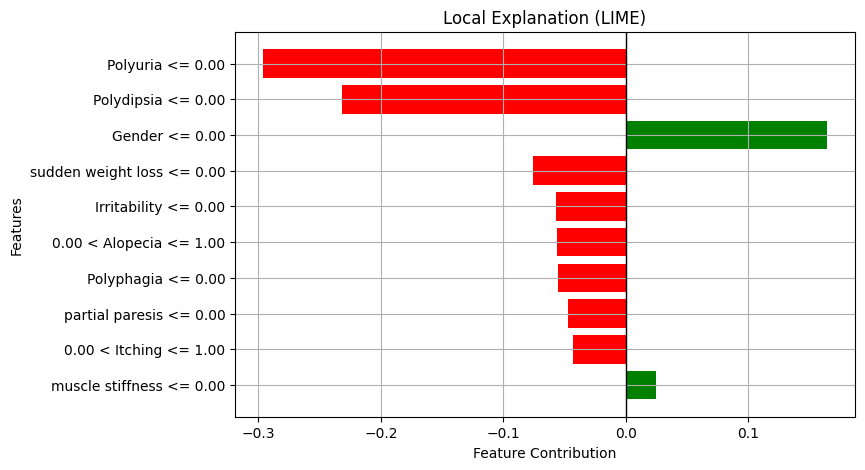

In [51]:
colors = lime_df['Contribution'].apply(
    lambda x: 'green' if x > 0 else 'red'
)

plt.figure(figsize=(8, 5))
plt.barh(
    lime_df['Feature'],
    lime_df['Contribution'],
    color=colors
)

plt.axvline(0, color='black', linewidth=1)
plt.xlabel("Feature Contribution")
plt.ylabel("Features")
plt.title("Local Explanation (LIME)")
plt.gca().invert_yaxis()
plt.grid(True)

plt.show()

Global Feature Importance using LIME

In [45]:

y_pred = rf_safe.predict(X_test)

lime_rows = []

for i in range(len(X_test_np)):
    if y_pred[i] == 1:   # only Diabetic predictions
        exp = explainer.explain_instance(
            X_test_np[i],
            rf_safe.predict_proba,
            num_features=len(feature_names)
        )

        for feature, weight in exp.as_list():
            lime_rows.append({
                'feature': feature,
                'lime_weight': abs(weight)   # absolute contribution
            })


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local

In [46]:
lime_global = (
    pd.DataFrame(lime_rows)
    .groupby('feature')
    .mean()
    .reset_index()
    .sort_values(by='lime_weight', ascending=False)
)

lime_global.head(10)


,feature,lime_weight
5,0.00 < Polyuria <= 1.00,0.290411
27,Polyuria <= 0.00,0.288522
25,Polydipsia <= 0.00,0.227462
3,0.00 < Polydipsia <= 1.00,0.225066
17,Gender <= 0.00,0.156097
1,0.00 < Gender <= 1.00,0.154826
9,0.00 < sudden weight loss <= 1.00,0.075236
31,sudden weight loss <= 0.00,0.074614
16,Alopecia <= 0.00,0.053433
0,0.00 < Alopecia <= 1.00,0.052331


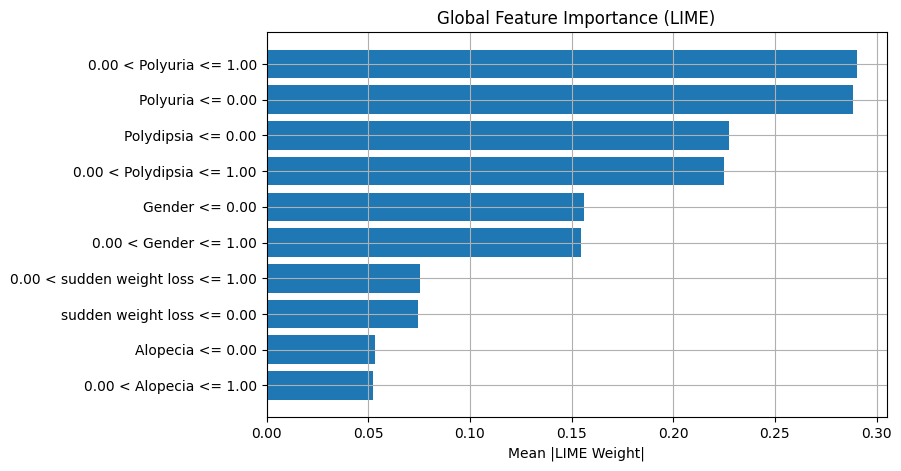

In [47]:
import matplotlib.pyplot as plt

top_k = 10

plt.figure(figsize=(8, 5))
plt.barh(
    lime_global['feature'][:top_k][::-1],
    lime_global['lime_weight'][:top_k][::-1]
)
plt.xlabel("Mean |LIME Weight|")
plt.title("Global Feature Importance (LIME)")
plt.grid(True)
plt.show()


SHAP explanation


In [54]:
!pip install shap


In [59]:
import shap


In [60]:
explainer = shap.TreeExplainer(rf_safe)


In [61]:
shap_values = explainer.shap_values(X_test)


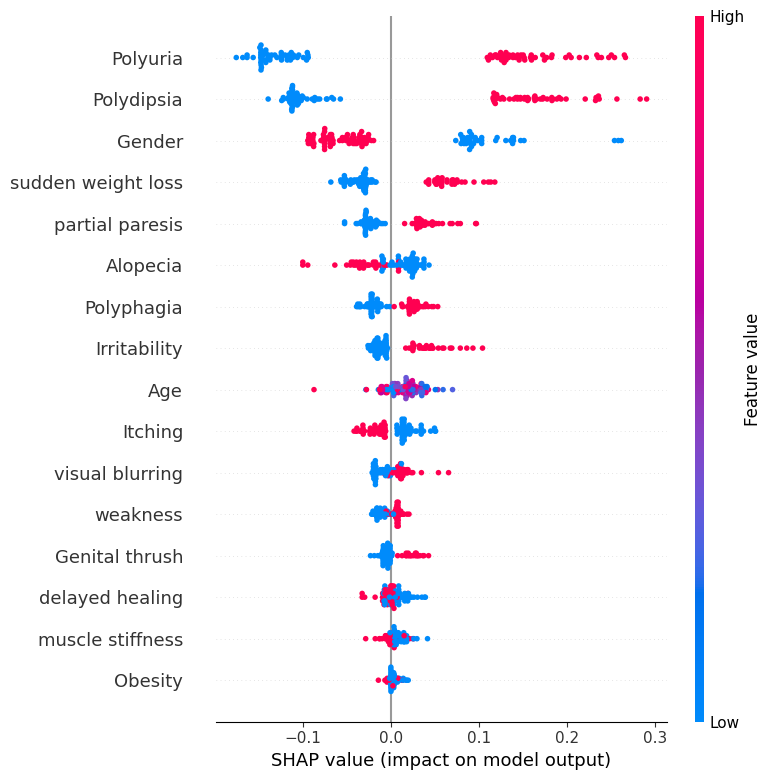

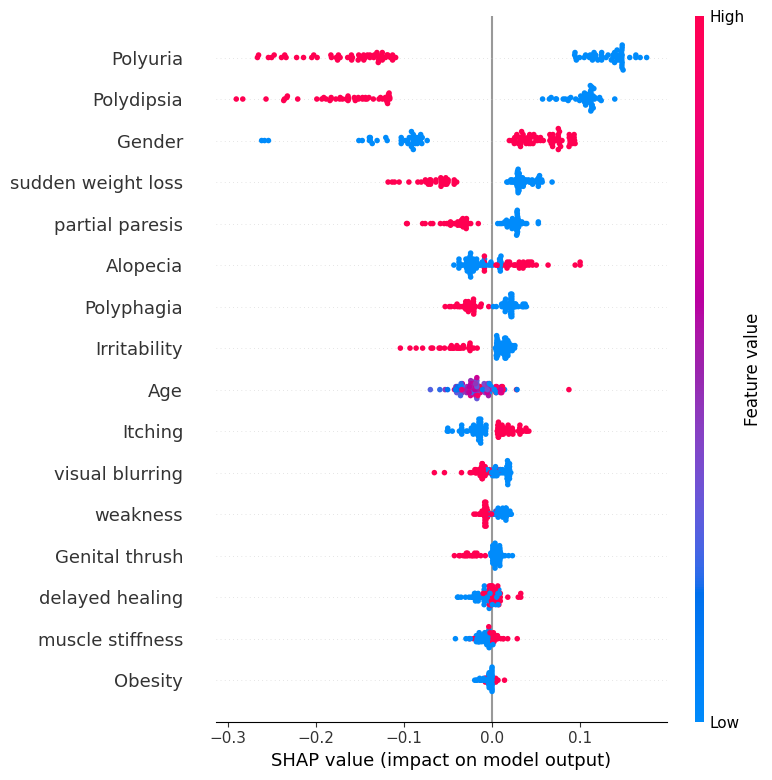

In [64]:
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=feature_names)

# Create explainer
explainer = shap.TreeExplainer(rf_safe)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

if isinstance(shap_values, list):
    shap_diabetic = shap_values[1]        # Class 1 = Diabetic
    shap_nondiabetic = shap_values[0]     # Class 0 = Non-Diabetic
else:
    shap_diabetic = shap_values[:, :, 1]
    shap_nondiabetic = shap_values[:, :, 0]

shap.summary_plot(
    shap_diabetic,
    X_test,
    feature_names=X_test.columns,
    show=True
)

shap.summary_plot(
    shap_nondiabetic,
    X_test,
    feature_names=X_test.columns,
    show=True
)
